<h1>Sunku Bhanu Kedhaar Nath - Z1974769</h1>

In [63]:
import pandas as pd
url = "http://faculty.cs.niu.edu/~dakoop/cs503-2022fa/a3/border-crossing.json"
df = pd.read_json(url)

In [64]:
df

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Pinecreek,Minnesota,3425,Canada,2022-07-01,Trucks,6
1,Laredo,Texas,2304,Mexico,2022-07-01,Trucks,228543
2,Ysleta,Texas,2401,Mexico,2022-07-01,Trucks,52944
3,Ysleta,Texas,2401,Mexico,2022-06-01,Trucks,56011
4,Alcan,Alaska,3104,Canada,2022-06-01,Trucks,453
...,...,...,...,...,...,...,...
159772,Port Angeles,Washington,3007,Canada,2010-07-01,Bus Passengers,233
159773,Whitlash,Montana,3321,Canada,2010-02-01,Rail Containers Loaded,0
159774,Hannah,North Dakota,3408,Canada,2010-02-01,Personal Vehicles,127
159775,Del Bonita,Montana,3322,Canada,2010-06-01,Train Passengers,0


1a) 

In [65]:
df2 = df[(df["Measure"] == "Bus Passengers")]
dff2 = df2[(df2["Value"] == df2["Value"].max())]
dff2[["Date","Port Name", "Value"]]


,Date,Port Name,Value
33192,2016-08-01,Laredo,143471


In [66]:
dff = df.groupby(['State'])
dff2 = dff[["State","Port Code"]]

In [67]:
se = pd.Series(dtype = int)
for group in dff2:
    group = list(group)
    # print(group[0], group[1]["Port Code"].unique().size)
    temp = pd.Series(index=[group[0]], data = group[1]["Port Code"].unique().size)
    se = pd.concat([se, temp], axis= 0)
se.index.name = 'States'
se

States
Alaska           4
Arizona          6
California       7
Idaho            2
Maine           13
Michigan         4
Minnesota        8
Montana         13
New Mexico       2
New York         7
North Dakota    18
Texas           13
Vermont          5
Washington      15
dtype: int64

2a)  Line Chart (15 pts)

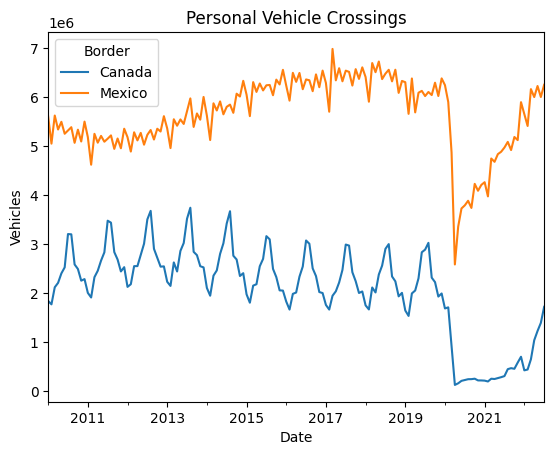

In [68]:
import matplotlib.pyplot as plt

df3 = df[df["Measure"] == "Personal Vehicles"]
# df5_canada = df3[df["Border"] == "Canada"]
# df5_mexico = df3[df["Border"] == "Mexico"]
df4 = df3.groupby(["Date", "Border"]).agg({"Value" : sum})
df5 = df4.unstack(level = -1)
df5.plot(title='Personal Vehicle Crossings', ylabel= "Vehicles")
legends = ["Canada","Mexico"]
plt.legend(legends, title = "Border")

# c =df5_canada.groupby(["Border", "Date"]).agg({"Value" : sum})
# df3.groupby("Border").agg({"Value" : sum}).plot(legend=True)
# c, m
# df4.plot(title = "Personal Vechile Crossing")
# df4 = df.groupby(['Border', 'Date'])
# for x in [c,m]:
#     plt.plot(x["Date"], x["Value"])

# c.plot(x="Date", y = "Value" )

# df5_canada.groupby(["Border", "Date"])["Value"].sum()


2b) Stacked Bar Chart (20 pts)

/var/folders/cd/60bgrl6d57gcpppm6fn4m4780000gn/T/ipykernel_59235/870039736.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_alaska1 = df_alaska[(df["Measure"] == "Pedestrians") | (df["Measure"] == "Train Passengers") | (df["Measure"] == "Bus Passengers") | (df["Measure"] == "Personal Vehicle Passengers") ]


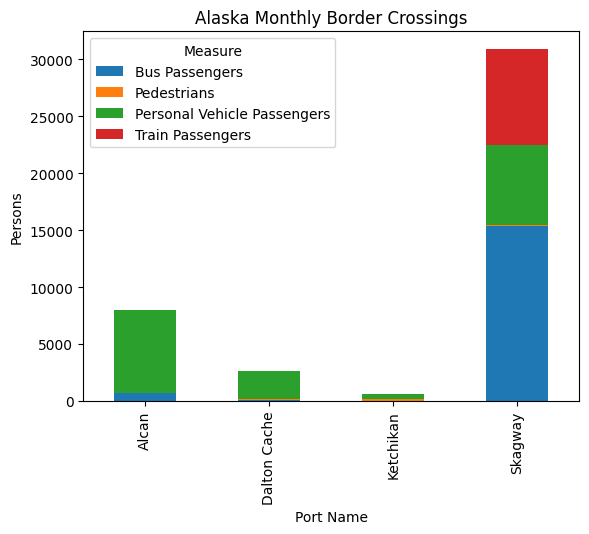

In [69]:
df_alaska= df[(df["State"] == "Alaska")]
# wanted_measures= ["Pedestrians", "Train Passengers", "Bus Passengers", "Personal Vehicle Passengers"]
df_alaska1 = df_alaska[(df["Measure"] == "Pedestrians") | (df["Measure"] == "Train Passengers") | (df["Measure"] == "Bus Passengers") | (df["Measure"] == "Personal Vehicle Passengers") ]
df2b = df_alaska1.groupby(["Port Name", "Measure"])["Value"].mean()
df2b1 = pd.DataFrame(df2b)
df2b2 = df2b1.unstack(level = -1)
legends = ["Bus Passengers", "Pedestrians", "Personal Vehicle Passengers", "Train Passengers"]
df2b2.plot(kind = "bar", stacked=True, title= "Alaska Monthly Border Crossings", xlabel="Port Name", ylabel = "Persons")
plt.legend(legends, title="Measure")



3a) Port of Entry Dot Plots

3b) Brushing

In [70]:
df3a = df[(df["Port Code"] == 901) | (df["Port Code"] == 3801) | (df["Port Code"] == 3004) | (df["Port Code"] == 3802) | (df["Port Code"] == 2504) | (df["Port Code"] == 2402) | (df["Port Code"] == 2506) | (df["Port Code"] == 2304) | (df["Port Code"] == 2305)]
df3a_1 = df3a[(df3a["Measure"] == "Personal Vehicles")]
s_date = pd.to_datetime("2019-01-01")
df3a_2 = df3a_1[(df["Date"] >= s_date)]
df3a_2
# df3a_2[["Port Name", "Value"]].groupby("Port Name").agg('mean').sort_values("Value", )

/var/folders/cd/60bgrl6d57gcpppm6fn4m4780000gn/T/ipykernel_59235/3172669084.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3a_2 = df3a_1[(df["Date"] >= s_date)]


,Port Name,State,Port Code,Border,Date,Measure,Value
292,Detroit,Michigan,3801,Canada,2022-07-01,Personal Vehicles,239871
484,Buffalo Niagara Falls,New York,901,Canada,2021-01-01,Personal Vehicles,25223
579,Blaine,Washington,3004,Canada,2020-06-01,Personal Vehicles,14387
626,Otay Mesa,California,2506,Mexico,2021-03-01,Personal Vehicles,452153
679,Buffalo Niagara Falls,New York,901,Canada,2020-04-01,Personal Vehicles,12069
...,...,...,...,...,...,...,...
52357,Otay Mesa,California,2506,Mexico,2019-01-01,Personal Vehicles,557207
56397,Hidalgo,Texas,2305,Mexico,2019-02-01,Personal Vehicles,342015
56430,Port Huron,Michigan,3802,Canada,2019-01-01,Personal Vehicles,87806
56805,Buffalo Niagara Falls,New York,901,Canada,2019-01-01,Personal Vehicles,265748


In [71]:
import altair as alt

br = alt.selection_interval(encodings=['x'])
colours = alt.condition(br, alt.value('red'), alt.value('blue'))

alt.Chart(df3a_2).mark_point().encode(x = alt.X('Date', scale=alt.Scale(zero=False),axis=alt.Axis(format='%Y'), title='Date'),
    y = "Value",
    facet=alt.Facet('Port Name', columns=3,sort=alt.EncodingSortField(field='Value', op='mean',order='descending')),
    color = colours).properties(width=250,height=200

    ).add_selection(br).configure_mark(filled=True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [72]:
df.columns.get_level_values(0)

Index(['Port Name', 'State', 'Port Code', 'Border', 'Date', 'Measure',
       'Value'],
      dtype='object')

In [73]:
df2b1

Value
Port Name    Measure                                  
Alcan        Bus Passengers                 682.500000
             Pedestrians                     51.203704
             Personal Vehicle Passengers   7251.721854
             Train Passengers                 0.000000
Dalton Cache Bus Passengers                  85.980769
             Pedestrians                     59.285714
             Personal Vehicle Passengers   2537.622517
             Train Passengers                 0.000000
Ketchikan    Bus Passengers                  22.763441
             Pedestrians                    124.551724
             Personal Vehicle Passengers    448.906780
             Train Passengers                 0.000000
Skagway      Bus Passengers               15407.447368
             Pedestrians                     43.830508
             Personal Vehicle Passengers   7066.701987
             Train Passengers              8393.705882

In [56]:
df2b2

Value                                          \
Measure      Bus Passengers Pedestrians Personal Vehicle Passengers   
Port Name                                                             
Alcan            682.500000   51.203704                 7251.721854   
Dalton Cache      85.980769   59.285714                 2537.622517   
Ketchikan         22.763441  124.551724                  448.906780   
Skagway        15407.447368   43.830508                 7066.701987   

                               
Measure      Train Passengers  
Port Name                      
Alcan                0.000000  
Dalton Cache         0.000000  
Ketchikan            0.000000  
Skagway           8393.705882